<a href="https://colab.research.google.com/github/santoshtmp/House_Price_banglor_flaskWEBAPP/blob/master/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# chi2
from scipy.stats import chi2_contingency

In [ ]:
#load/read the train datasets
dataset=pd.read_excel("/content/drive/My Drive/Colab_NB_Datasets/Case Study - Data Engineering Visualization Analyst.xlsx","Recruiting Activity Data")


In [ ]:
display(dataset.shape)
dataset.head(3)

(7410, 20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education 1,NaN,NaN,Education 2,NaN,NaN,Education 3,NaN,NaN,Education 4,NaN,NaN
1,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,Major,Degree,School,Major,Degree,School,Major,Degree,School,Major
2,3668741,Associate Product Manager,Product,New Application,2016-11-17 00:00:00,Campus Event,0,Campus,Bachelors,NYU,Computer Science,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.columns=dataset.iloc[0].apply(lambda x: x+" " if(pd.notna(x)) else '')+dataset.iloc[1]
dataset=dataset.drop(index=[0,1],axis=0).reset_index(drop=True)
display(dataset.shape)
dataset.head(3)



(7408, 20)

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major
0,3668741,Associate Product Manager,Product,New Application,2016-11-17 00:00:00,Campus Event,0,Campus,Bachelors,NYU,Computer Science,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN
1,783317,Operations Coordinator,Operations,New Application,2017-12-22 00:00:00,Campus Job Board,0,Campus,Bachelors,Harvard,Political Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20 00:00:00,Agency,6,Experienced,Bachelors,Columbia,Statistics,Masters,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['Candidate ID Number', 'Position Title', 'Department',
       'Furthest Recruiting Stage Reached', 'Date of Application',
       'Application Source', 'Years of Experience', 'Candidate Type',
       'Education 1 Degree', 'School', 'Major', 'Education 2 Degree', 'School',
       'Major', 'Education 3 Degree', 'School', 'Major', 'Education 4 Degree',
       'School', 'Major'],
      dtype='object')

### 1.) calculate the highest degree for each candidate using the education columns

the order of degrees to consider from highest to lowest
1. PhD = 1
2. Masters (including JD)3 = 2
3. Bachelors = 3

The funnels should show the number of unique candidates who moved through each recruiting stage (including offer response). Count each candidate only once per Recruiting Funnel; if a candidate applied to multiple positions within a given department, count them once for the application that reached the furthest recruiting stage.



In [ ]:
dataset['Education 1 Degree'].value_counts()

Bachelors    5795
Masters       932
PhD           674
JD              7
Name: Education 1 Degree, dtype: int64

In [ ]:
dataset['Education 2 Degree'].value_counts()

Bachelors    2143
PhD           570
Masters       445
JD              3
Name: Education 2 Degree, dtype: int64

In [ ]:
dataset['Education 3 Degree'].value_counts()

Bachelors    600
Masters      258
PhD          124
Name: Education 3 Degree, dtype: int64

In [ ]:
# lets replace 
# PhD = 1
# Masters (including JD)3 = 2
# Bachelors = 3

dataset.replace(to_replace=['PhD','Masters','JD','Bachelors'], value=[1,2,2,3],inplace = True)

In [ ]:
dataset['Education 2 Degree'].value_counts()

3.0    2143
1.0     570
2.0     448
Name: Education 2 Degree, dtype: int64

In [ ]:
dataset['high_edu']=dataset[['Education 1 Degree','Education 2 Degree','Education 3 Degree']].min(axis=1)
dataset.head(3)

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,3,NYU,Computer Science,3.0,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,3,Harvard,Political Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,3,Columbia,Statistics,2.0,NYU,Computer Science,2.0,University of Washington,Mathematics,NaN,NaN,NaN,2.0


In [ ]:
# calculate the highest degree for each candidate using the education columns
# PhD = 1
# Masters (including JD)3 = 2
# Bachelors = 3
candidate_high_edu=dataset[['Candidate ID Number','high_edu']]
candidate_high_edu

,Candidate ID Number,high_edu
0,3668741,3.0
1,783317,3.0
2,2046362,2.0
3,39321,3.0
4,222272,1.0
...,...,...
7403,6166724,1.0
7404,1718459,3.0
7405,10008,3.0
7406,4432109,1.0


In [ ]:
dataset['Furthest Recruiting Stage Reached'].value_counts()

New Application       5639
Phone Screen           886
In-House Interview     719
Offer Sent             134
In-house Interview      30
Name: Furthest Recruiting Stage Reached, dtype: int64

In [ ]:
# lets combine In-House Interview and  In-house Interview
dataset['Furthest Recruiting Stage Reached']=dataset['Furthest Recruiting Stage Reached'].replace({'In-house Interview':'In-House Interview'})

In [ ]:
Recruiting_Funnel=dataset['Furthest Recruiting Stage Reached'].value_counts().reset_index()
Recruiting_Funnel.columns=['stage','Applicants']
Recruiting_Funnel

,stage,Applicants
0,New Application,5639
1,Phone Screen,886
2,In-House Interview,749
3,Offer Sent,134


##### lets read accepted dataset

In [ ]:
offer_accepted=pd.read_excel("/content/drive/My Drive/Colab_NB_Datasets/Case Study - Data Engineering Visualization Analyst.xlsx","Offer Response Data")
display(offer_accepted.shape)
display(offer_accepted.head())
offer_accepted['Offer Decision'].value_counts()

(134, 2)

,Candidate ID Number,Offer Decision
0,3368,Offer Accepted
1,10008,Offer Accepted
2,2790,Offer Accepted
3,3500,Offer Accepted
4,2675,Offer Accepted


Offer Accepted            74
Offer Declined            48
Offer Response Pending    12
Name: Offer Decision, dtype: int64

In [ ]:
# lets make list of candidate send offer from initial dataset
Offer_Sent_candidate=dataset['Candidate ID Number'][dataset['Furthest Recruiting Stage Reached']=='Offer Sent']
display(Offer_Sent_candidate.shape)
Offer_Sent_candidate=Offer_Sent_candidate.to_list()

(134,)

In [ ]:
# lets compare Offer_Sent_candidate and offer_accepted andidate list data
invalid_candidate_offer=[]
for i in np.arange(offer_accepted.shape[0]):  
  offer_acc=offer_accepted['Candidate ID Number'][i] 
  if ((offer_acc in Offer_Sent_candidate)==False):
    invalid_candidate_offer.append(offer_acc)
invalid_candidate_offer

[]

This means all the candidate in offer_accepted dataset are valid . sinice they are the exact same candidate which are in offer_sent

In [ ]:
offer_accepted=offer_accepted['Offer Decision'].value_counts().reset_index()
offer_accepted

,index,Offer Decision
0,Offer Accepted,74
1,Offer Declined,48
2,Offer Response Pending,12


In [ ]:
# lets make same column name as of  Recruiting_Funnel
offer_accepted.columns=['stage','Applicants']
offer_accepted


,stage,Applicants
0,Offer Accepted,74
1,Offer Declined,48
2,Offer Response Pending,12


In [ ]:
# lets concate the offer_accepted and Recruiting_Funnel and make Recruiting_Funnel
Recruiting_Funnel=pd.concat([Recruiting_Funnel,offer_accepted]).reset_index(drop=True)
Recruiting_Funnel

,stage,Applicants
0,New Application,5639
1,Phone Screen,886
2,In-House Interview,749
3,Offer Sent,134
4,Offer Accepted,74
5,Offer Declined,48
6,Offer Response Pending,12


In [ ]:
# lets consider 'Offer Response Pending' as also 'Offer Declined', 
# then
# lets drop 'Offer Declined' and 'Offer Response Pending'
# 
Recruiting_Funnel.drop(Recruiting_Funnel.loc[Recruiting_Funnel['stage']=='Offer Declined'].index, inplace=True)
Recruiting_Funnel.drop(Recruiting_Funnel.loc[Recruiting_Funnel['stage']=='Offer Response Pending'].index, inplace=True)

In [ ]:
Recruiting_Funnel

,stage,Applicants
0,New Application,5639
1,Phone Screen,886
2,In-House Interview,749
3,Offer Sent,134
4,Offer Accepted,74


In [ ]:
conversion_rate=['-']
k=0
for i in np.arange(Recruiting_Funnel.shape[0]-1):
  j=k+1
  rate=np.round(Recruiting_Funnel['Applicants'][j]/Recruiting_Funnel['Applicants'][k]*100,2)
  rate=str(rate)+'%'
  conversion_rate.append(rate)
  k=j
conversion_rate

['-', '15.71%', '84.54%', '17.89%', '55.22%']

In [ ]:
Recruiting_Funnel['conversion_rate']=conversion_rate
Recruiting_Funnel


,stage,Applicants,conversion_rate
0,New Application,5639,-
1,Phone Screen,886,15.71%
2,In-House Interview,749,84.54%
3,Offer Sent,134,17.89%
4,Offer Accepted,74,55.22%


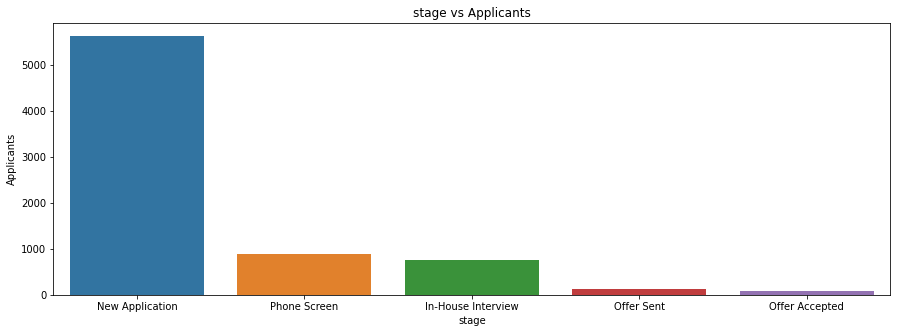

In [ ]:
 plt.figure(figsize=(15,5))
 sns.barplot(x="stage", y="Applicants", data=Recruiting_Funnel)
 plt.title("stage vs Applicants")
 plt.show()

#### Hence, 
1. To calculate the highest degree for each candidate using the education columns is "candidate_high_edu" 
2. The number of unique candidates who moved through each recruiting stage is "Recruiting_Funnel"

In [ ]:
# lets take only year from 'Date of Application'
dataset['Date of Application']=dataset['Date of Application'].apply(pd.to_datetime)
dataset['Date of Application']=pd.DatetimeIndex(dataset['Date of Application']).year
dataset.head(3)

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
0,3668741,Associate Product Manager,Product,New Application,2016,Campus Event,0,Campus,3,NYU,Computer Science,3.0,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,783317,Operations Coordinator,Operations,New Application,2017,Campus Job Board,0,Campus,3,Harvard,Political Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2046362,Business Operations Manager,Operations,New Application,2018,Agency,6,Experienced,3,Columbia,Statistics,2.0,NYU,Computer Science,2.0,University of Washington,Mathematics,NaN,NaN,NaN,2.0


## 2) Identify candidates (i) whose Furthest Recruiting Stage Reached was In-House Interview or beyond, and (ii) who applied from the Application Sources of Career Fair or Campus Event only. Test for statistically significant differences in the rate at which these candidates reached the in-house interview stage or beyond between calendar year




In [ ]:
dataset['Furthest Recruiting Stage Reached'].value_counts()

New Application       5639
Phone Screen           886
In-House Interview     749
Offer Sent             134
Name: Furthest Recruiting Stage Reached, dtype: int64

In [ ]:
# lets identify the candidate who are in "In-House Interview" stage or beyond

# candidate_inHou_beyond=dataset.loc[dataset['Furthest Recruiting Stage Reached']=='In-House Interview']

candidate_inHou_beyond=dataset.drop(dataset[dataset['Furthest Recruiting Stage Reached'] == 'New Application' ].index)
candidate_inHou_beyond=candidate_inHou_beyond.drop(candidate_inHou_beyond[candidate_inHou_beyond['Furthest Recruiting Stage Reached'] == 'Phone Screen' ].index)

display(candidate_inHou_beyond.head(3))
print("Total number of candidate who are in 'In-House Interview' stage or beyond are: ",candidate_inHou_beyond.shape[0])
candidate_inHou_beyond.shape

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
21,3722351,Associate Relationship Manager,Sales,In-House Interview,2018,Campus Job Board,1,Campus,3,Columbia,Management,3.0,MIT,Economics,NaN,NaN,NaN,NaN,NaN,NaN,3.0
32,239982,Business Operations Manager,Operations,In-House Interview,2018,Agency,6,Experienced,3,University of Texas,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
39,747636,Associate Relationship Manager,Sales,In-House Interview,2017,Campus Event,0,Campus,3,University of Texas,Political Science,3.0,NYU,Business,NaN,NaN,NaN,NaN,NaN,NaN,3.0


Total number of candidate who are in 'In-House Interview' stage or beyond are:  883


(883, 21)

#### (ii) who applied from the Application Sources of Career Fair or Campus Event only

In [ ]:
# lets identify the candidate who applied from the Application Sources of Career Fair or Campus Event only.

display(dataset['Application Source'].value_counts())


Campus Job Board     2616
Career Fair          1550
Campus Event          939
Website               906
Advertisement         765
Agency                396
Outsourced            162
Internal Referral      74
Name: Application Source, dtype: int64

In [ ]:
# lets take only "New applications" data
new_applications= dataset.loc[dataset['Furthest Recruiting Stage Reached']=='New Application']
new_applications['Application Source'].value_counts()

Campus Job Board     2105
Career Fair          1211
Website               659
Campus Event          622
Advertisement         606
Agency                268
Outsourced            124
Internal Referral      44
Name: Application Source, dtype: int64

In [ ]:
print("candidate who applied from Career Fair are : ",
      new_applications['Application Source'].value_counts().to_list()[1])

print(" candidate who applied from Campus Event are : ",
      new_applications['Application Source'].value_counts().to_list()[3])

candidate who applied from Career Fair are :  1211
 candidate who applied from Campus Event are :  622


In [ ]:
# OR
# OR

In [ ]:
# From Career Fair
# candidates record
candidate_Career_Fair=new_applications.loc[new_applications['Application Source']=='Career Fair'].reset_index(drop=True)
display(candidate_Career_Fair.shape)
print("Total number of candidate who are applied from the Application Sources of Career Fair are: ",candidate_Career_Fair.shape[0])
candidate_Career_Fair.head()


(1211, 21)

Total number of candidate who are applied from the Application Sources of Career Fair are:  1211


,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
0,39321,System Engineer,Engineering,New Application,2018,Career Fair,0,Campus,3,University of Washington,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,103092,System Engineer,Engineering,New Application,2016,Career Fair,0,Campus,3,Harvard,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,39050,System Engineer,Engineering,New Application,2016,Career Fair,0,Campus,3,NYU,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,36395,System Engineer,Engineering,New Application,2018,Career Fair,0,Campus,3,UC Berkeley,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,157311,System Engineer,Engineering,New Application,2018,Career Fair,0,Campus,3,MIT,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
# From Campus Event
# candidates record
candidate_Campus_Event=new_applications.loc[new_applications['Application Source']=='Campus Event'].reset_index(drop=True)
display(candidate_Campus_Event.shape)
print("Total number of candidate who are applied from the Application Sources of Campus Event are: ",candidate_Campus_Event.shape[0])
candidate_Campus_Event.head()

(622, 21)

Total number of candidate who are applied from the Application Sources of Campus Event are:  622


,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
0,3668741,Associate Product Manager,Product,New Application,2016,Campus Event,0,Campus,3,NYU,Computer Science,3.0,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,135087,Operations Coordinator,Operations,New Application,2018,Campus Event,0,Campus,3,Columbia,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,104667,System Engineer,Engineering,New Application,2016,Campus Event,0,Campus,3,NYU,Mathematics,1.0,University of Texas,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,5589284,Financial Analyst,Finance,New Application,2018,Campus Event,0,Campus,3,University of Michigan,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,4066476,System Engineer,Engineering,New Application,2018,Campus Event,0,Campus,1,University of Texas,Physics,2.0,Vanderbilt,English,3.0,UC Berkeley,Mathematics,NaN,NaN,NaN,1.0


##### Test for statistically significant differences in the rate at which these candidates reached the in-house interview stage or beyond between calendar year

In [ ]:
candidate_inHou_beyond['Application Source'].value_counts()

Campus Job Board     243
Campus Event         182
Career Fair          149
Website              120
Advertisement         78
Agency                72
Outsourced            24
Internal Referral     15
Name: Application Source, dtype: int64

In [ ]:
print("Campus Event Candidates reaches the in-house interview stage or beyond are : ",
      candidate_inHou_beyond['Application Source'].value_counts().to_list()[1])

print("Career Fair Candidates reaches the in-house interview stage or beyond are : ",
      candidate_inHou_beyond['Application Source'].value_counts().to_list()[2])

Campus Event Candidates reaches the in-house interview stage or beyond are :  182
Career Fair Candidates reaches the in-house interview stage or beyond are :  149


In [ ]:
# # lets take only year from 'Date of Application'
# candidate_inHou_beyond['Date of Application']=candidate_inHou_beyond['Date of Application'].apply(pd.to_datetime)
# candidate_inHou_beyond['Date of Application']=pd.DatetimeIndex(candidate_inHou_beyond['Date of Application']).year
# candidate_inHou_beyond.head(3)


In [ ]:
pvtable_date_source_inhouse=pd.pivot_table(candidate_inHou_beyond,
               values='Candidate ID Number',
               columns=['Application Source'],
               index=['Date of Application'],
               aggfunc=len,
               fill_value=0)
pvtable_date_source_inhouse

Application Source,Advertisement,Agency,Campus Event,Campus Job Board,Career Fair,Internal Referral,Outsourced,Website
Date of Application,,,,,,,,
2016,22,10,56,72,42,2,11,32
2017,24,26,52,58,42,5,5,33
2018,32,36,74,113,65,8,8,55


In [ ]:
pvtable_date_source_newapp=pd.pivot_table(new_applications,
               values='Candidate ID Number',
               columns=['Application Source'],
               index=['Date of Application'],
               aggfunc=len,
               fill_value=0)
pvtable_date_source_newapp

Application Source,Advertisement,Agency,Campus Event,Campus Job Board,Career Fair,Internal Referral,Outsourced,Website
Date of Application,,,,,,,,
2016,169,66,122,549,343,7,47,203
2017,251,100,125,641,301,21,35,203
2018,186,102,375,915,567,16,42,253


In [ ]:
rate_Campus_Event=[
np.round(pvtable_date_source_inhouse['Campus Event'][2016]/pvtable_date_source_newapp['Campus Event'][2016]*100,2),
np.round(pvtable_date_source_inhouse['Campus Event'][2017]/pvtable_date_source_newapp['Campus Event'][2017]*100,2),
np.round(pvtable_date_source_inhouse['Campus Event'][2018]/pvtable_date_source_newapp['Campus Event'][2018]*100,2)]

rate_Campus_Event

[45.9, 41.6, 19.73]

In [ ]:
rate_Career_Fair=[
np.round(pvtable_date_source_inhouse['Career Fair'][2016]/pvtable_date_source_newapp['Career Fair'][2016]*100,2),
np.round(pvtable_date_source_inhouse['Career Fair'][2017]/pvtable_date_source_newapp['Career Fair'][2017]*100,2),
np.round(pvtable_date_source_inhouse['Career Fair'][2018]/pvtable_date_source_newapp['Career Fair'][2018]*100,2)]

rate_Career_Fair

[12.24, 13.95, 11.46]

In [ ]:
rate_Campus_Career_year=pd.DataFrame({'rate_Campus_Event':rate_Campus_Event,'rate_Career_Fair':rate_Career_Fair,'year':[2016,2017,2018]})
rate_Campus_Career_year

,rate_Campus_Event,rate_Career_Fair,year
0,45.90,12.24,2016
1,41.60,13.95,2017
2,19.73,11.46,2018


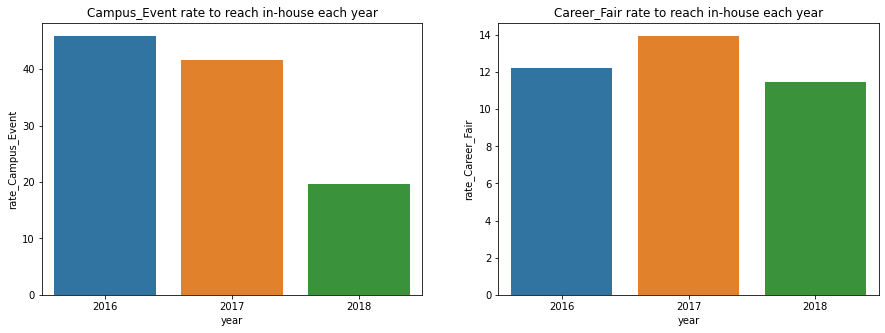

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x="year", y="rate_Campus_Event", data=rate_Campus_Career_year)
plt.title("Campus_Event rate to reach in-house each year")

plt.subplot(122)
sns.barplot(x="year", y="rate_Career_Fair", data=rate_Campus_Career_year)
plt.title("Career_Fair rate to reach in-house each year")

plt.show()

In [ ]:
# # For candidate who applied from career fare and reached inhouse or beyond
# candidate_Career_Fair_inhouse=candidate_inHou_beyond.loc[candidate_inHou_beyond['Application Source']=='Career Fair'].reset_index(drop=True)
# display(candidate_Career_Fair_inhouse.shape)
# print("Total number of candidate who  applied from the Application Sources of Career Fair and reached inhouse interview or beyond are: ",
#       candidate_Career_Fair_inhouse.shape[0])


# # For candidate who applied from Campus Event and reached inhouse or beyond
# candidate_Campus_Event_inhouse=candidate_inHou_beyond.loc[candidate_inHou_beyond['Application Source']=='Campus Event'].reset_index(drop=True)
# display(candidate_Campus_Event_inhouse.shape)
# print("Total number of candidate who applied from the Application Sources of Campus Event and reached inhouse interview or beyond are: ",
#       candidate_Campus_Event_inhouse.shape[0])



In [ ]:
# candidate_Career_Fair_inhouse_rate=np.round(candidate_Career_Fair_inhouse.shape[0]/dataset.shape[0]*100,2)
# display(candidate_Career_Fair_inhouse_rate)

# candidate_Campus_Event_inhouse_inhouse_rate=np.round(candidate_Campus_Event_inhouse.shape[0]/dataset.shape[0]*100,2)
# display(candidate_Campus_Event_inhouse_inhouse_rate)


# carrer_campus_inhouse_rate=pd.DataFrame(list(zip( ['Campus_Event','Carrer_fare'],[candidate_Campus_Event_inhouse_inhouse_rate,candidate_Career_Fair_inhouse_rate])),
#                columns =['types', 'rate'])

# display(carrer_campus_inhouse_rate)

# sns.barplot(x="types", y="rate", data=carrer_campus_inhouse_rate)

Treat these candidates as a single group, and test for differences year-over-year (i.e., test for the calculated binary variable "Reached In-House Interview" for candidates sourced from Career Fairs or Campus Events in 2017 vs. the same population in 2018, and so on for each year combination of two years). Use pairwise chi-squared tests to determine which years had statistically significantly different in-house interview rates.

In [ ]:
#  candidate in Reached In-House Interview from Career Fairs or Campus Events
candidate_Career_Fair_inhouse=candidate_inHou_beyond.loc[candidate_inHou_beyond['Application Source']=='Career Fair'].reset_index(drop=True)
candidate_Campus_Event_inhouse=candidate_inHou_beyond.loc[candidate_inHou_beyond['Application Source']=='Campus Event'].reset_index(drop=True)

candidate_Career_Campus_inhouse=pd.concat([candidate_Career_Fair_inhouse,candidate_Campus_Event_inhouse], ignore_index=True)
display(candidate_Career_Campus_inhouse.shape)
candidate_Career_Campus_inhouse.head()

(331, 21)

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
0,698642,System Engineer,Engineering,In-House Interview,2017,Career Fair,0,Campus,3,University of Texas,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,3285,System Engineer,Engineering,Offer Sent,2017,Career Fair,0,Campus,3,Columbia,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,252834,System Engineer,Engineering,In-House Interview,2016,Career Fair,0,Campus,1,Vanderbilt,Mathematics,3.0,MIT,Physics,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3322409,Associate Relationship Manager,Sales,In-House Interview,2018,Career Fair,0,Campus,3,MIT,Economics,3.0,Harvard,Sociology,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,307436,System Engineer,Engineering,In-House Interview,2018,Career Fair,1,Campus,3,University of Michigan,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
# doa=candidate_Career_Campus_inhouse['Date of Application'].value_counts().reset_index()
# doa.columns=['year','Applicants']
# doa.sort_values(by=['year'],ascending=False,inplace=True)


# sns.barplot(x="year", y="Applicants", data=doa)

# doa

In [ ]:
crosstab=pd.crosstab(candidate_Career_Campus_inhouse['Date of Application'],candidate_Career_Campus_inhouse['Application Source'])
crosstab

Application Source,Campus Event,Career Fair
Date of Application,,
2016,56,42
2017,52,42
2018,74,65


In [ ]:
pvtable_date_source_inhouse

Application Source,Advertisement,Agency,Campus Event,Campus Job Board,Career Fair,Internal Referral,Outsourced,Website
Date of Application,,,,,,,,
2016,22,10,56,72,42,2,11,32
2017,24,26,52,58,42,5,5,33
2018,32,36,74,113,65,8,8,55


In [ ]:
crosstab_16_17=crosstab.drop(index=2018)
crosstab_16_17

Application Source,Campus Event,Career Fair
Date of Application,,
2016,56,42
2017,52,42


In [ ]:
crosstab_17_18=crosstab.drop(index=2016)
crosstab_17_18

Application Source,Campus Event,Career Fair
Date of Application,,
2017,52,42
2018,74,65


In [ ]:
chi2_contingency(crosstab)
# chi2, p, dof, expected = chi2_contingency(crosstab)

(0.36011279039498223, 0.8352231075109704, 2, array([[53.88519637, 44.11480363],
        [51.6858006 , 42.3141994 ],
        [76.42900302, 62.57099698]]))

In [ ]:
chi2_contingency(crosstab_16_17)


(0.011909931145710564, 0.9130972936665109, 1, array([[55.125, 42.875],
        [52.875, 41.125]]))

In [ ]:
chi2_contingency(crosstab_17_18)


(0.031983039253907664,
 0.8580648867887225,
 1,
 array([[50.83261803, 43.16738197],
        [75.16738197, 63.83261803]]))

## 3) Create a single data visualization to show which Application Sources are the most/least effective (you may interpret "effectiveness" in any way you choose). 

In [ ]:
dataset['Application Source'].value_counts()

Campus Job Board     2616
Career Fair          1550
Campus Event          939
Website               906
Advertisement         765
Agency                396
Outsourced            162
Internal Referral      74
Name: Application Source, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


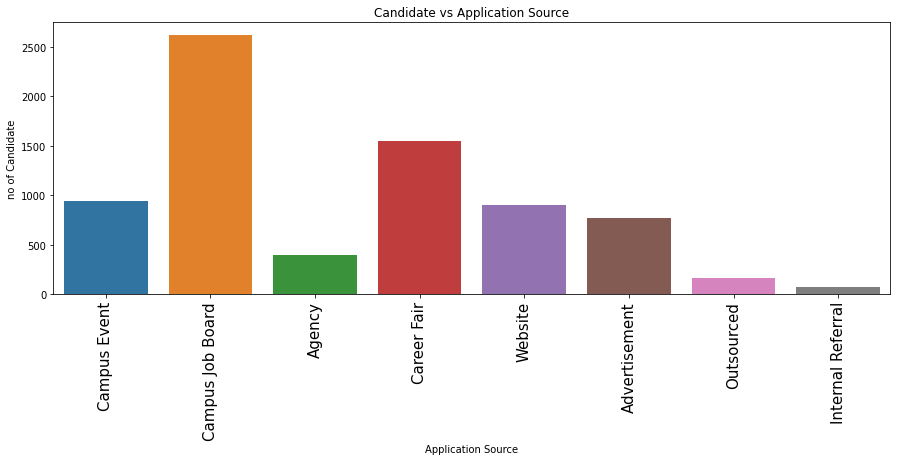

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("Application Source", data=dataset)
plt.title("Candidate vs Application Source")
plt.xticks(rotation=90, size=15)
plt.ylabel("no of Candidate")
plt.show()

In [ ]:
dataset['Application Source'].value_counts().index

Index(['Campus Job Board', 'Career Fair', 'Campus Event', 'Website',
       'Advertisement', 'Agency', 'Outsourced', 'Internal Referral'],
      dtype='object')

### Lets view which "application source" has most "offer sent"

In [ ]:
source_cand_offer=[]
for i in dataset['Application Source'].value_counts().index:
  v=dataset[(dataset['Furthest Recruiting Stage Reached']=='Offer Sent')&(dataset['Application Source']==i)].shape[0]
  source_cand_offer.append(v)
source_cand_offer


[24, 22, 37, 16, 10, 20, 4, 1]

In [ ]:
source_total_offer=dataset['Application Source'].value_counts().reset_index()
source_total_offer.columns=['Application Source','Total_Candidate']
source_total_offer['Total_offer_Candidate']=source_cand_offer
source_total_offer

,Application Source,Total_Candidate,Total_offer_Candidate
0,Campus Job Board,2616,24
1,Career Fair,1550,22
2,Campus Event,939,37
3,Website,906,16
4,Advertisement,765,10
5,Agency,396,20
6,Outsourced,162,4
7,Internal Referral,74,1


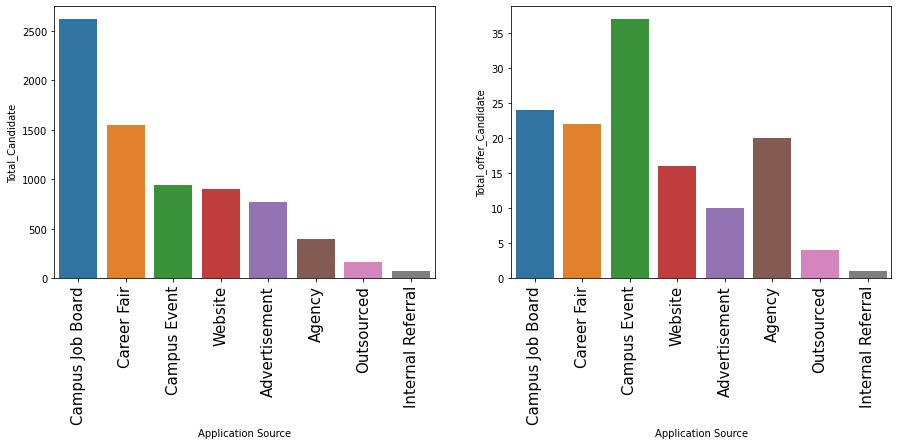

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x="Application Source", y="Total_Candidate", data=source_total_offer)
plt.xticks(rotation=90, size=15)

plt.subplot(122)
sns.barplot(x="Application Source", y="Total_offer_Candidate", data=source_total_offer)
plt.xticks(rotation=90, size=15)

plt.show()


In [ ]:
source_cand_offer_rate=[]
for i in np.arange(8):
  rate=np.round(source_total_offer['Total_offer_Candidate'][i]/source_total_offer['Total_Candidate'][i]*100,2)
  source_cand_offer_rate.append(rate)
source_cand_offer_rate

[0.92, 1.42, 3.94, 1.77, 1.31, 5.05, 2.47, 1.35]

In [ ]:
source_total_offer['Offer_Candidate_rate']=source_cand_offer_rate
source_total_offer.sort_values(by='Offer_Candidate_rate',inplace=True)
source_total_offer

,Application Source,Total_Candidate,Total_offer_Candidate,Offer_Candidate_rate
0,Campus Job Board,2616,24,0.92
4,Advertisement,765,10,1.31
7,Internal Referral,74,1,1.35
1,Career Fair,1550,22,1.42
3,Website,906,16,1.77
6,Outsourced,162,4,2.47
2,Campus Event,939,37,3.94
5,Agency,396,20,5.05


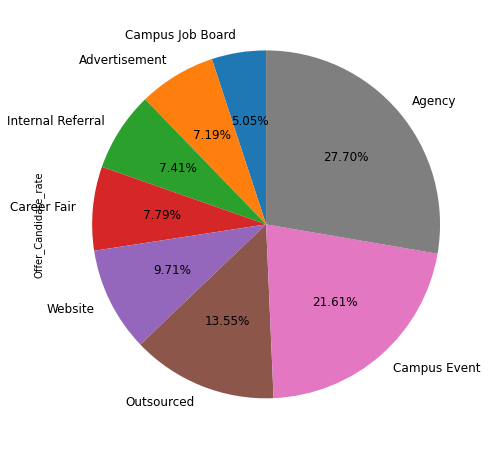

In [ ]:
plt.figure(figsize=(15,8))
source_total_offer['Offer_Candidate_rate'].plot.pie(labels=source_total_offer['Application Source'],
        startangle=90,
        autopct='%1.2f%%',
        fontsize=12)
# plt.legend(loc='center right')
plt.show()

### Lets view From which "application source" there are more number of candidate in each "Department" to reach In-house or beyond

In [ ]:
dataset.head(1)

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
0,3668741,Associate Product Manager,Product,New Application,2016,Campus Event,0,Campus,3,NYU,Computer Science,3.0,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
dataset2=dataset.drop(dataset[dataset['Furthest Recruiting Stage Reached'] == 'New Application' ].index)
dataset2=dataset2.drop(dataset2[dataset2['Furthest Recruiting Stage Reached'] == 'Phone Screen' ].index)
display(dataset2.shape)
dataset2.head(3)

(883, 21)

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Education 1 Degree,School,Major,Education 2 Degree,School,Major,Education 3 Degree,School,Major,Education 4 Degree,School,Major,high_edu
21,3722351,Associate Relationship Manager,Sales,In-House Interview,2018,Campus Job Board,1,Campus,3,Columbia,Management,3.0,MIT,Economics,NaN,NaN,NaN,NaN,NaN,NaN,3.0
32,239982,Business Operations Manager,Operations,In-House Interview,2018,Agency,6,Experienced,3,University of Texas,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
39,747636,Associate Relationship Manager,Sales,In-House Interview,2017,Campus Event,0,Campus,3,University of Texas,Political Science,3.0,NYU,Business,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
# number of candidate from 'Department'=='Engineering' AND 'Application Source'=='Campus Job Board'
dataset2[(dataset2['Department']=='Engineering')&(dataset2['Application Source']=='Campus Job Board')].shape[0]

77

In [ ]:
pvtable_dep_source=pd.pivot_table(dataset2,
               values='Candidate ID Number',
               columns=['Application Source'],
               index=['Department'],
               aggfunc=len,
               fill_value=0)
pvtable_dep_source

Application Source,Advertisement,Agency,Campus Event,Campus Job Board,Career Fair,Internal Referral,Outsourced,Website
Department,,,,,,,,
Engineering,25,6,121,77,76,2,1,33
Finance,3,7,4,4,2,2,0,4
IT,5,4,5,7,6,0,1,8
Operations,12,24,2,5,7,7,20,11
Product,12,20,20,57,23,3,1,24
Sales,21,11,30,93,35,1,1,40


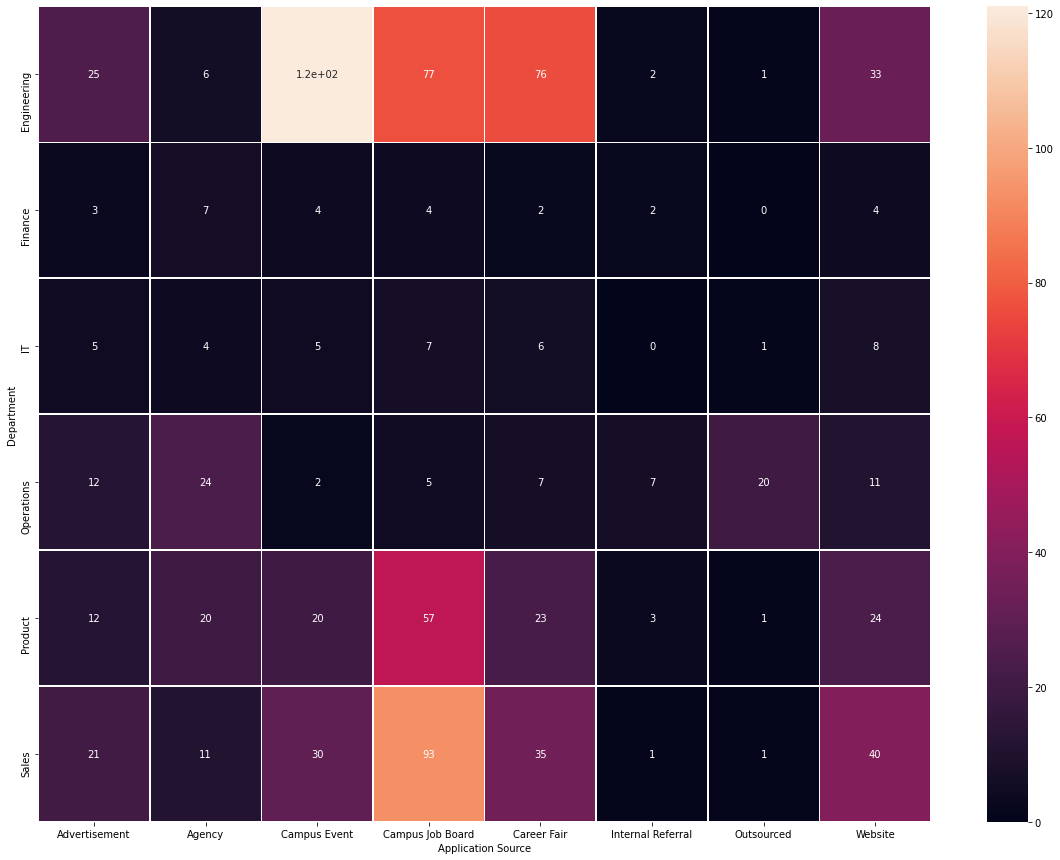

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(pvtable_dep_source,annot=True,linewidths=.5)
plt.show()

### Lets view From which "Application source"  has more "high_education" candidate to reach in-house or beyond stage

In [ ]:
pvtable_edu_source=pd.pivot_table(dataset2,
               values='Candidate ID Number',
               columns=['Application Source'],
               index=['high_edu'],
               aggfunc=len,
               fill_value=0)
pvtable_edu_source

Application Source,Advertisement,Agency,Campus Event,Campus Job Board,Career Fair,Internal Referral,Outsourced,Website
high_edu,,,,,,,,
1.0,24,16,110,87,39,3,0,36
2.0,12,12,11,42,14,2,4,18
3.0,42,44,61,114,96,10,20,66


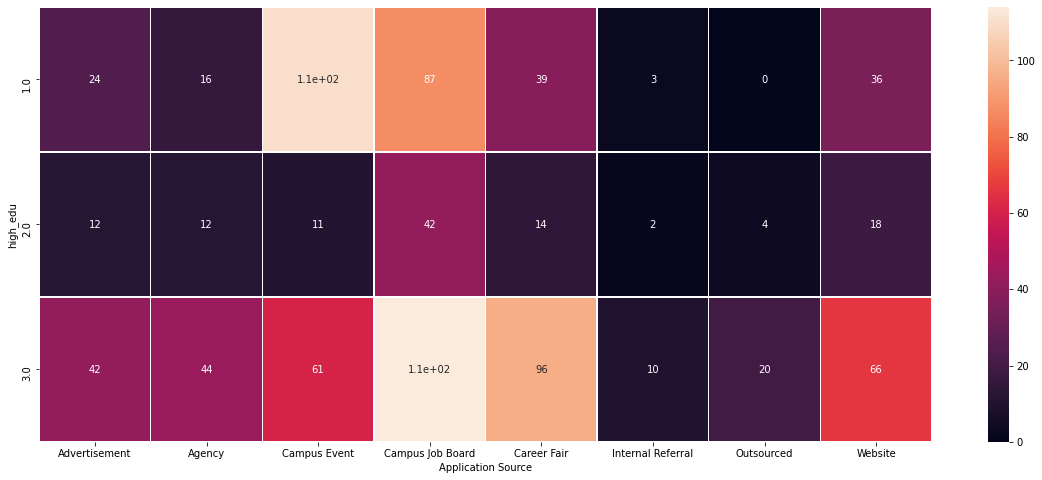

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(pvtable_edu_source,annot=True,linewidths=.5)
plt.show()

In [ ]:
pvtable_stage_source=pd.pivot_table(dataset2,
               values='Candidate ID Number',
               columns=['Application Source'],
               index=['Furthest Recruiting Stage Reached'],
               aggfunc=len,
               fill_value=0)
pvtable_stage_source

Application Source,Advertisement,Agency,Campus Event,Campus Job Board,Career Fair,Internal Referral,Outsourced,Website
Furthest Recruiting Stage Reached,,,,,,,,
In-House Interview,68,52,145,219,127,14,20,104
Offer Sent,10,20,37,24,22,1,4,16


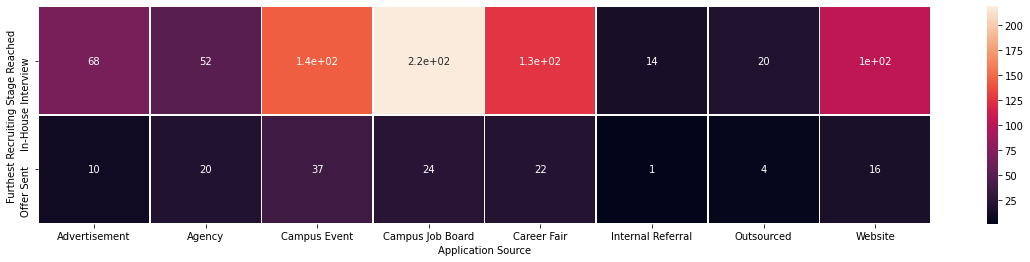

In [ ]:
plt.figure(figsize=(20,4))
sns.heatmap(pvtable_stage_source,annot=True,linewidths=.5)
plt.show()